# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Scudetto Ciano Syam
- **Email:** scudetto024@gmail.com
- **ID Dicoding:** scode_cs

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan waktu (jam dan hari)?
- Apakah ada perbedaan signifikan antara hari kerja dan akhir pekan, atau antara musim yang berbeda?
- Faktor apa saja yang mempengaruhi jumlah penggunaan sepeda, seperti cuaca, suhu, atau kecepatan angin?

## Import Semua Packages/Library yang Digunakan

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Proses ini mencakup meload data dan transformasi data, seperti memeriksa missing values, mengubah tipe data, dan menfecek data untuk analisis lebih lanjut.

### Gathering Data

In [69]:
# pastikan folder data ada dalam folder assignment
# membuat df day.csv
day_df = pd.read_csv('./data/day.csv') 

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [70]:
# membuat df hour.csv
hour_df = pd.read_csv('./data/hour.csv')

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- bike-sharing-dataset terdiri dari 2 file csv yaitu day.csv dan hour.csv
- day.csv: Dataset ini berisi data penggunaan sepeda yang dirangkum berdasarkan hari, terdapat informasi seperti cuaca, suhu, dll. Terdapat 16 atribut, termasuk informasi waktu (dteday, season, yr, dll.) dan metrik penggunaan sepeda (casual, registered, cnt).
- hour.csv : Dataset ini lebih detail karena mencatat data penggunaan sepeda berdasarkan jam, mencakup variabel lingkungan seperti suhu,  jumlah pengguna per jam, dll.Terdapat 17 atribut, dengan tambahan atribut spesifik jam (hr) dibandingkan dengan day.csv.

### Assessing Data

### check df day

In [71]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [72]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [73]:
print(f'jumlah duplikat : {day_df.duplicated().sum()}')

jumlah duplikat : 0


In [74]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### check df hour

In [75]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [76]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [77]:
print(f'jumlah duplikat : {hour_df.duplicated().sum()}')

jumlah duplikat : 0


In [78]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

Dataset day.csv:
- Dataset ini memiliki 16 kolom dan 731 baris, merepresentasikan data penggunaan sepeda harian selama dua tahun (2011-2012). Semua kolom bebas dari nilai kosong (missing value) dan duplikat.
- Kolom numerik seperti temp, atemp, hum, dan windspeed berada dalam rentang 0 hingga 1, yang mungkin menunjukkan nilai telah dinormalisasi.
- Jumlah total pengguna sepeda harian (cnt) berkisar antara 22 hingga 8714, dengan rata-rata sekitar 4504 pengguna per hari, di mana pengguna terdaftar (registered) mendominasi dibandingkan pengguna biasa (casual).
  
Dataset hour.csv:
- Dataset ini memiliki 17 kolom dan 17379 baris, berisi data penggunaan sepeda per jam selama periode yang sama (2011-2012). Sama seperti day.csv, dataset ini tidak memiliki nilai kosong ataupun duplikat.
- Variabel waktu, seperti hr, merepresentasikan jam (0-23), sedangkan kolom cuaca seperti temp, atemp, hum, dan windspeed juga sepertinya dinormalisasi dalam rentang 0 hingga 1.
- Penggunaan sepeda per jam (cnt) berkisar antara 1 hingga 977 pengguna, dengan rata-rata sekitar 189 pengguna per jam, yang menunjukkan fluktuasi lebih besar dibandingkan data harian.


### Cleaning Data

In [79]:
# Verifikasi Missing Value
print("Missing values pada day.csv:\n", day_df.isna().sum())

Missing values pada day.csv:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [80]:
print("Missing values pada hour.csv:\n", hour_df.isna().sum())

Missing values pada hour.csv:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [81]:
# Verifikasi Duplicate Data
print("Duplicate rows pada day.csv:", day_df.duplicated().sum())

Duplicate rows pada day.csv: 0


In [82]:
print("Duplicate rows pada hour.csv:", hour_df.duplicated().sum())

Duplicate rows pada hour.csv: 0


**Insight:**

Missing Value:
- Hasil dari isna().sum() menunjukkan bahwa tidak ada nilai kosong pada kedua dataset (day.csv dan hour.csv)
- Oleh karena itu saya tidak mengambil langkah tambahan untuk mengatasi missing value (Dropping, Imputation, Interpolation )

Duplicate Data:
- Hasil dari duplicated().sum() menunjukkan bahwa tidak ada duplikasi data di kedua dataset
- Tidak ada langkah tambahan yang diperlukan untuk menghapus duplikasi (drop_duplicates())
  
Outlier:
- Dari hasil analisis data pada kolom numerik tampak telah dinormalisasi (misalnya, temp, hum, windspeed berada dalam rentang 0 hingga 1)
- Outlier pada kolom target (cnt) mungkin terlihat seperti angka ekstrem, tetapi secara logis dapat diterima karena merepresentasikan penggunaan sepeda pada kondisi tertentu (seperti cuaca buruk atau jam sibuk). Tidak ada indikasi outlier yang perlu ditangani (Drop, Imputation )

## Exploratory Data Analysis (EDA)

Tahap ini digunakan untuk memahami pola awal dalam data, seperti distribusi variabel utama, hubungan antar variabel, dan analisis pola penggunaan berdasarkan waktu.

### Explore ...

### explore day df

In [83]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
659,660,2012-10-21,4,1,10,0,0,0,1,0.464167,0.456429,0.510000,0.166054,2132,4692,6824
443,444,2012-03-19,1,1,3,0,1,1,1,0.545000,0.532821,0.728750,0.162317,982,5171,6153
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
400,401,2012-02-05,1,1,2,0,0,0,2,0.265833,0.264521,0.687917,0.175996,318,2629,2947


In [84]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [85]:
# distribusi musim
day_df['season'].value_counts() 

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [86]:
# Distribusi cuaca
day_df['weathersit'].value_counts() 

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

In [87]:
# Korelasi antar variabel numerik
day_df.corr(numeric_only=True)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [88]:
# Rata-rata jumlah peminjaman berdasarkan musim
day_df.groupby('season').cnt.mean()

# season (1:springer, 2:summer, 3:fall, 4:winter)

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

In [89]:
# rata-rata peminjaman harian berdasarkan cuaca
day_df.groupby('weathersit').cnt.mean()
 
# weathersit : 
# 		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + 

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64

In [90]:
# rata2 peminjaman berdasarkan akhir pekan vs hari kerja
day_df.groupby("workingday")["cnt"].mean()

workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64

In [91]:
day_df.groupby('temp').cnt.mean() 
# mencoba menggunakan scatterplot untuk melihat hubungan

temp
0.059130     981.0
0.096522     986.0
0.097391    1416.0
0.107500    2368.0
0.127500    1529.0
             ...  
0.834167    5463.0
0.838333    3846.0
0.848333    3387.0
0.849167    3285.0
0.861667    4840.0
Name: cnt, Length: 499, dtype: float64

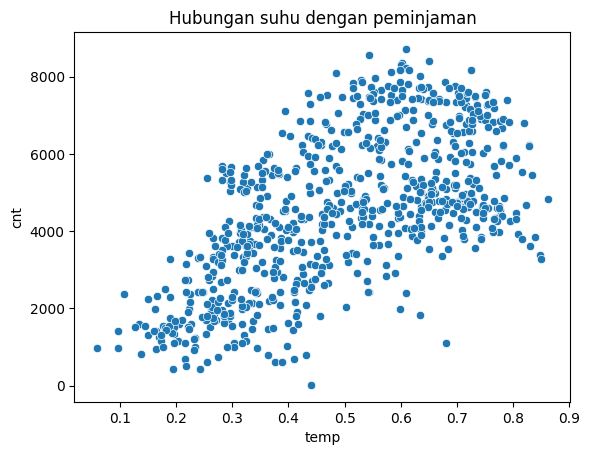

In [92]:
# scatter plot jumlah peminjaman vs suhu 
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Hubungan suhu dengan peminjaman')
plt.show()

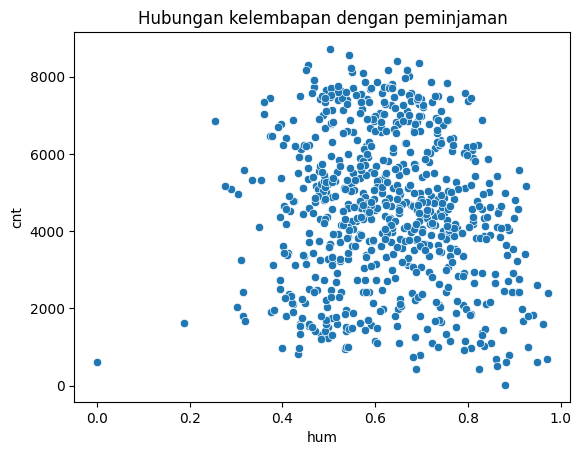

In [93]:
# Scatter plot jumlah peminjaman vs kelembaban
sns.scatterplot(x='hum', y='cnt', data=day_df, )
plt.title('Hubungan kelembapan dengan peminjaman')
plt.show();

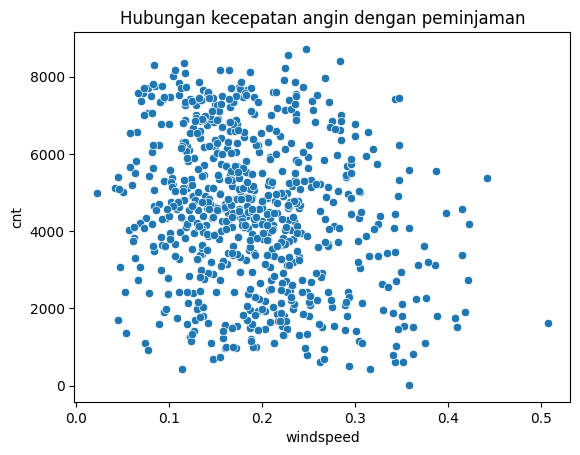

In [94]:
# Scatter plot jumlah peminjaman vs kecepatan angin
sns.scatterplot(data=day_df, x="windspeed", y="cnt",)
plt.title('Hubungan kecepatan angin dengan peminjaman')
plt.show();

In [95]:
# Ubah kolom dteday menjadi format datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

**Insight:**
-  Musim gugur dan panas memiliki rata-rata peminjaman tertinggi, sementara musim semi cenderung memiliki rata-rata peminjaman terendah.

- Semakin tinggi suhu, jumlah peminjaman sepeda cenderung meningkat secara konstan.

- Peminjaman cenderung lebih tinggi pada kecepatan angin sedang (0.1-0.2) dan kelembapan moderat (0.4-0.8), dengan jumlah peminjaman yang jauh lebih sedikit pada kelembapan rendah dan kecepatan angin tinggi.

## explore hour df

In [96]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [97]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8431,8432,2011-12-22,1,0,12,23,0,4,1,3,0.40,0.4091,0.87,0.0000,1,10,11
7830,7831,2011-11-27,4,0,11,21,0,0,0,1,0.48,0.4697,0.67,0.2836,13,75,88
8679,8680,2012-01-02,1,1,1,11,1,1,0,1,0.26,0.2121,0.35,0.4925,33,142,175
6931,6932,2011-10-21,4,0,10,10,0,5,1,1,0.46,0.4545,0.51,0.1642,32,106,138
3980,3981,2011-06-19,2,0,6,18,0,0,0,2,0.74,0.6818,0.58,0.0896,78,218,296


In [98]:
# distribusi jam
hour_df['hr'].value_counts()

hr
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64

In [99]:
# distribusi hari
hour_df['weekday'].value_counts()

weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64

In [100]:
day_df.corr(numeric_only=True)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [101]:
# Rata-rata jumlah peminjaman berdasarkan jam
hour_df.groupby('hr').cnt.mean()

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64

In [102]:
# Rata-rata jumlah peminjaman berdasarkan hari kerja
hour_df.groupby('weekday').cnt.mean()

weekday
0    177.468825
1    183.744655
2    191.238891
3    191.130505
4    196.436665
5    196.135907
6    190.209793
Name: cnt, dtype: float64

In [103]:
# Ubah kolom dteday menjadi format datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

**Insight:**
- Jumlah penyewaan sepeda (kolom cnt) tertinggi terjadi pada jam sibuk seperti pukul 8 pagi dan 5 sore, yang kemungkinan besar bertepatan dengan jam berangkat dan pulang kerja.
- Aktivitas penyewaan juga cenderung lebih tinggi pada hari kerja dibandingkan dengan akhir pekan, dengan rata-rata jumlah yang lebih besar pada hari Kamis dan Jumat.

## Explore day_df & hour_df

In [104]:
# Pilih kolom yang relevan sebelum merge
hour_df_filtered = hour_df[
    ["instant", "dteday", "hr", "holiday", "workingday", 
     "weathersit", "temp", "hum", "windspeed", "cnt"]
]

day_df_filtered = day_df[
    ["instant", "dteday", "season", "weekday", "cnt"]
]


# Merge dengan atribut terpilih
day_hour_df = pd.merge(
    left=hour_df_filtered,
    right=day_df_filtered,
    how="left",
    on="dteday"
)

day_hour_df.head()

,instant_x,dteday,hr,holiday,workingday,weathersit,temp,hum,windspeed,cnt_x,instant_y,season,weekday,cnt_y
0,1,2011-01-01,0,0,0,1,0.24,0.81,0.0,16,1,1,6,985
1,2,2011-01-01,1,0,0,1,0.22,0.80,0.0,40,1,1,6,985
2,3,2011-01-01,2,0,0,1,0.22,0.80,0.0,32,1,1,6,985
3,4,2011-01-01,3,0,0,1,0.24,0.75,0.0,13,1,1,6,985
4,5,2011-01-01,4,0,0,1,0.24,0.75,0.0,1,1,1,6,985


In [105]:
# menambah kolom is_weekend untuk memudahkan analisis 
day_hour_df["is_weekend"] = day_hour_df["weekday"].apply(lambda x: "Weekend" if x in [0, 6] else "Weekday")

In [106]:
# rename kolum agar lebih jelas dan tidak ambigu
day_hour_df.rename(
    columns={
        "instant_x": "hour_instant",
        "cnt_x": "hour_count",
        "cnt_y": "day_count"
    },
    inplace=True
)

In [107]:
# hubungan cuaca (weathersit) dengan rata-rata jumlah penyewaan sepeda setiap jam
day_hour_df.groupby("weathersit")["hour_count"].mean()

weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: hour_count, dtype: float64

In [108]:
# hubungan jumlah penyewaan sepeda berdasarkan jam dan akhir pekan
day_hour_df.groupby(["hr", "is_weekend"])["hour_count"].mean().reset_index()

,hr,is_weekend,hour_count
0,0,Weekday,37.626692
1,0,Weekend,94.148325
2,1,Weekday,17.464078
3,1,Weekend,72.583732
4,2,Weekday,9.377953
5,2,Weekend,55.980676
6,3,Weekday,5.188525
7,3,Weekend,26.995215
8,4,Weekday,5.446939
9,4,Weekend,8.497585


In [109]:
# Korelasi variabel numerik dalam data gabungan
day_hour_df[["hour_count", "temp", "hum", "windspeed", "day_count"]].corr()

,hour_count,temp,hum,windspeed,day_count
hour_count,1.000000,0.404772,-0.322911,0.093234,0.437289
temp,0.404772,1.000000,-0.069881,-0.023125,0.592402
hum,-0.322911,-0.069881,1.000000,-0.290105,-0.067356
windspeed,0.093234,-0.023125,-0.290105,1.000000,-0.145990
day_count,0.437289,0.592402,-0.067356,-0.145990,1.000000


In [110]:
day_hour_df["hour_to_day_ratio"] = day_hour_df["hour_count"] / day_hour_df["day_count"]
day_hour_df.groupby("hr")["hour_to_day_ratio"].mean()

hr
0     0.013944
1     0.007924
2     0.005583
3     0.002844
4     0.001449
5     0.004332
6     0.016596
7     0.045681
8     0.080100
9     0.050361
10    0.039272
11    0.046762
12    0.056948
13    0.057313
14    0.054493
15    0.056618
16    0.068832
17    0.100866
18    0.092401
19    0.067472
20    0.049018
21    0.037465
22    0.028713
23    0.019294
Name: hour_to_day_ratio, dtype: float64

**Insight:**
- Penyewaan sepeda paling tinggi terjadi saat cuaca cerah (kategori weathersit=1), dengan rata-rata 204 sepeda per jam, sedangkan cuaca buruk (kategori weathersit=4) hanya 74 sepeda per jam. Hal ini menunjukkan bahwa cuaca memengaruhi keputusan pengguna untuk menyewa sepeda.
- Pada hari kerja, terdapat dua puncak penyewaan (jam 8 pagi dan 5 sore) yang mencerminkan pola perjalanan kerja. Sebaliknya, akhir pekan menunjukkan pola penggunaan lebih stabil sepanjang siang hari, menandakan penyewaan mungkin lebih untuk rekreasi.
- Jam 8 pagi dan 5 sore menyumbang rasio tertinggi terhadap total penyewaan harian (8-10% per jam), menguatkan peran jam sibuk sebagai waktu utama penyewaan sepeda.

## Visualization & Explanatory Analysis

Hasil analisis disajikan melalui visualisasi, seperti grafik penggunaan sepeda berdasarkan waktu, kategori suhu, dan perbandingan hari kerja dengan akhir pekan.

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu (jam dan hari)? 

In [111]:
day_hour_df.sample(5)

,hour_instant,dteday,hr,holiday,workingday,weathersit,temp,hum,windspeed,hour_count,instant_y,season,weekday,day_count,is_weekend,hour_to_day_ratio
2981,2982,2011-05-09,3,0,1,1,0.46,0.82,0.0896,7,129,2,1,4362,Weekday,0.001605
263,264,2011-01-12,10,0,1,1,0.18,0.55,0.2239,39,12,1,3,1162,Weekday,0.033563
759,760,2011-02-04,1,0,1,2,0.16,0.59,0.0000,7,35,1,5,1708,Weekday,0.004098
1023,1024,2011-02-15,8,0,1,1,0.20,0.32,0.3582,223,46,1,2,1815,Weekday,0.122865
7383,7384,2011-11-09,6,0,1,1,0.30,0.87,0.0000,98,313,4,3,4109,Weekday,0.023850


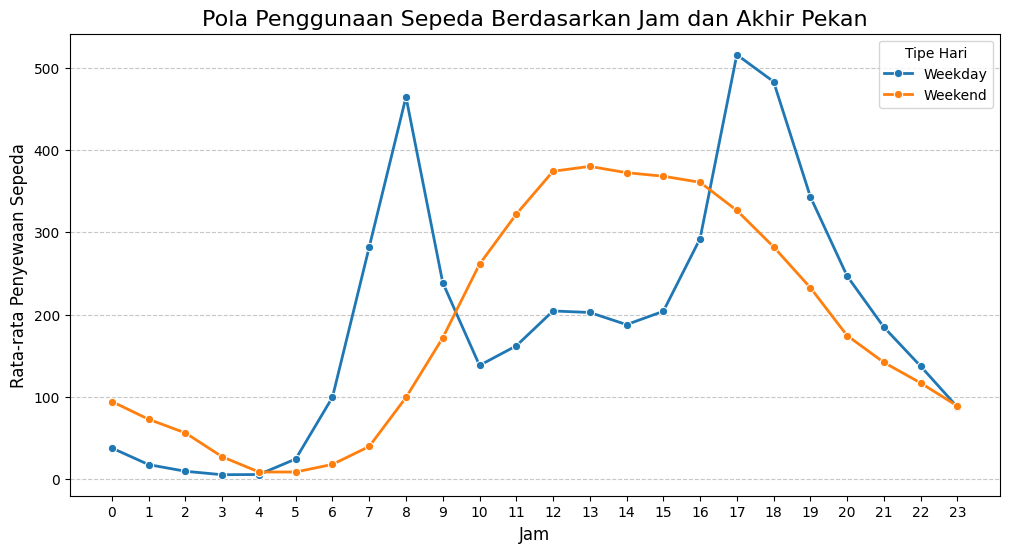

In [112]:
# Rata rata penggunaan sepeda berdasarkan jam dan tipe hari
hourly_usage = day_hour_df.groupby(["hr", "is_weekend"])["hour_count"].mean().reset_index()

# Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_usage, x="hr", y="hour_count", hue="is_weekend", marker="o", linewidth=2)
plt.title("Pola Penggunaan Sepeda Berdasarkan Jam dan Akhir Pekan", fontsize=16)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.xticks(range(0, 24), fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Tipe Hari", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


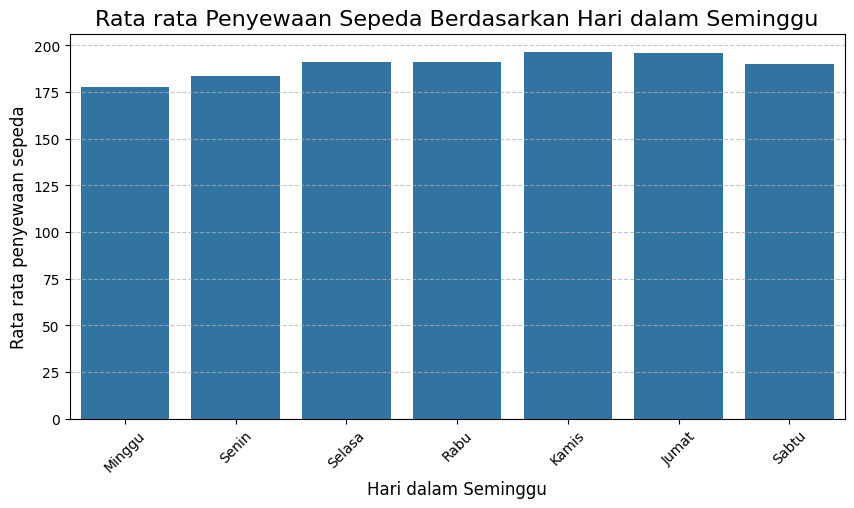

In [113]:
# Rata rata penggunaan sepeda berdasarkan hari dalam seminggu
weekday_usage = day_hour_df.groupby('weekday')['hour_count'].mean().reset_index()

# visualisasi
plt.figure(figsize=(10,5))
sns.barplot(x='weekday', y='hour_count', data=weekday_usage)
plt.title('Rata rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu', fontsize=16)
plt.xlabel('Hari dalam Seminggu', fontsize=12)
plt.ylabel('Rata rata penyewaan sepeda', fontsize=12)
# mengganti label angka menjadi nama hari
plt.xticks(range(0, 7), labels=["Minggu", "Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu"], fontsize=10, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

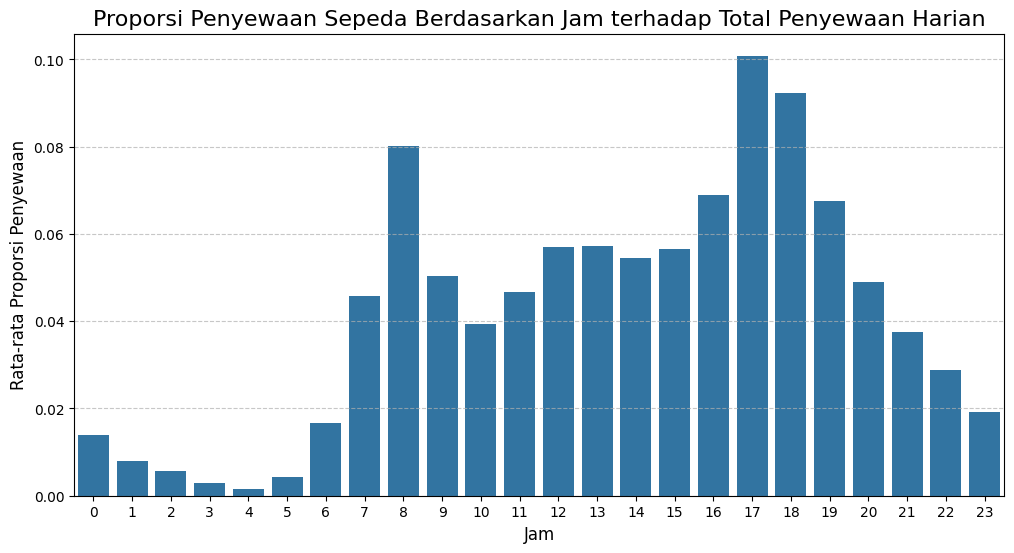

In [114]:
# Rata rata rasio jam terhadap total penyewaan harian

hour_to_day_ratio = day_hour_df.groupby('hr')['hour_to_day_ratio'].mean().reset_index()

# visualisasi
plt.figure(figsize=(12,6))
sns.barplot(x='hr', y='hour_to_day_ratio', data=hour_to_day_ratio)
plt.title('Proporsi Penyewaan Sepeda Berdasarkan Jam terhadap Total Penyewaan Harian', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Proporsi Penyewaan', fontsize=12)
plt.xticks(range(0,24), fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
-  Pada hari kerja pola puncak pada jam sibuk (8 pagi dan 5 sore), yang mendukung pola perjalanan kerja.
- Akhir pekan menunjukkan pola penggunaan stabil sepanjang siang hari, yang mungkin dilakukan untuk rekreasi.
- Jumlah penyewaan tertinggi terjadi pada akhir pekan (Sabtu dan Minggu), kemungkinan karena waktu luang lebih banyak.
- Proporsi tertinggi terjadi pada jam 8 pagi dan 5 sore, terutama pada hari kerja, menunjukkan bahwa waktu ini adalah puncak penggunaan sepeda.

### Pertanyaan 2: Apakah ada perbedaan signifikan antara hari kerja dan akhir pekan, atau antara musim yang berbeda?

/var/folders/vs/zksk8xgx1vxczt_hfgx08gzc0000gn/T/ipykernel_34742/425499433.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


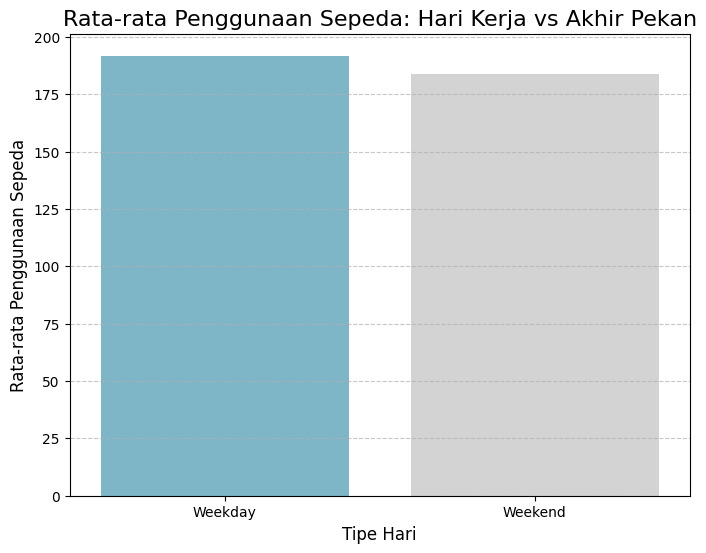

In [115]:
# mengelompokkan data berdasarkan hari kerja dan akhir pekan
weekday_vs_weekend_df = day_hour_df.groupby("is_weekend").agg({
    "hour_count": "mean"
}).reset_index()

# visualisasi 
plt.figure(figsize=(8, 6))
sns.barplot(
    data=weekday_vs_weekend_df, 
    x="is_weekend", 
    y="hour_count", 
    palette=["#72BCD4", "#D3D3D3"]  
)
plt.title("Rata-rata Penggunaan Sepeda: Hari Kerja vs Akhir Pekan", fontsize=16)
plt.xlabel("Tipe Hari", fontsize=12)
plt.ylabel("Rata-rata Penggunaan Sepeda", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

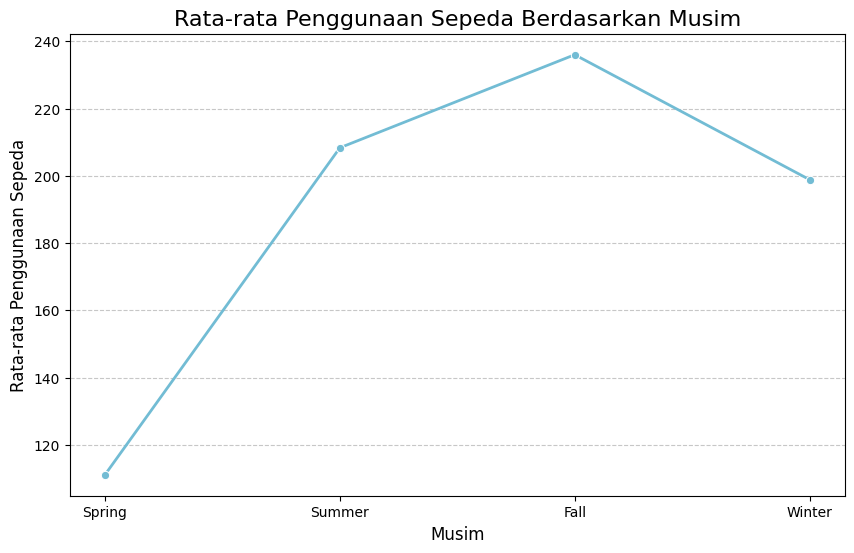

In [116]:
# Mengelompokkan data berdasarkan musim
season_df = day_hour_df.groupby("season").agg({
    "hour_count": "mean"
}).reset_index()

# mengganti/map nama musim (1: Spring, 2: Summer, 3: Fall, 4: Winter)
season_df["season_name"] = season_df["season"].map({
    1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"
})

# Visualisasi
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=season_df, 
    x="season_name", 
    y="hour_count", 
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Rata-rata Penggunaan Sepeda Berdasarkan Musim", fontsize=16)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-rata Penggunaan Sepeda", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Rata-rata penggunaan sepeda lebih tinggi pada weekday, yang mungkin menunjukkan sepeda masih banyak digunakan untuk kebutuhan rutin seperti berangkat kerja,dll
- Rata-rata penggunaan sepeda tertinggi terjadi pada musim gugur, diikuti oleh musim panas, musim dingin, dan terendah pada musim semi, kemungkinan dipengaruhi oleh kenyamanan dan kondisi cuaca masing-masing musim.

### Pertanyaan 3: Faktor apa saja yang mempengaruhi jumlah penggunaan sepeda, seperti cuaca, suhu, atau kecepatan angin?

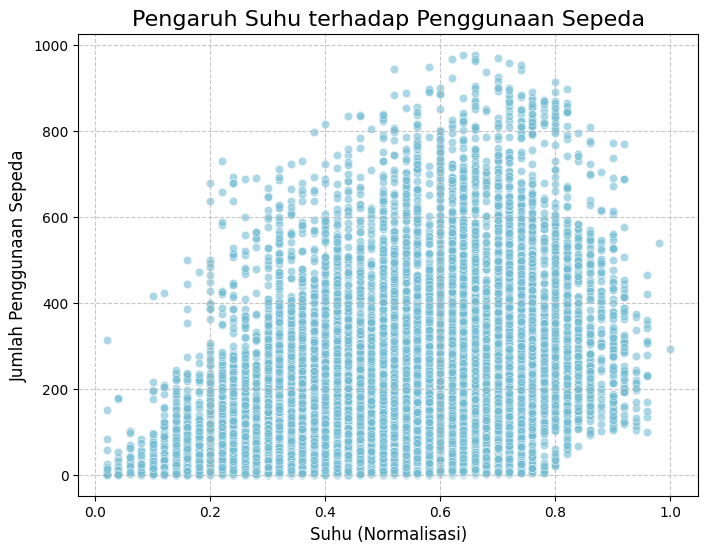

In [118]:
# Scatter plot suhu vs penggunaan sepeda
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=day_hour_df,
    x="temp",
    y="hour_count",
    alpha=0.6,
    color="#72BCD4"
)
plt.title("Pengaruh Suhu terhadap Penggunaan Sepeda", fontsize=16)
plt.xlabel("Suhu (Normalisasi)", fontsize=12)
plt.ylabel("Jumlah Penggunaan Sepeda", fontsize=12)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()


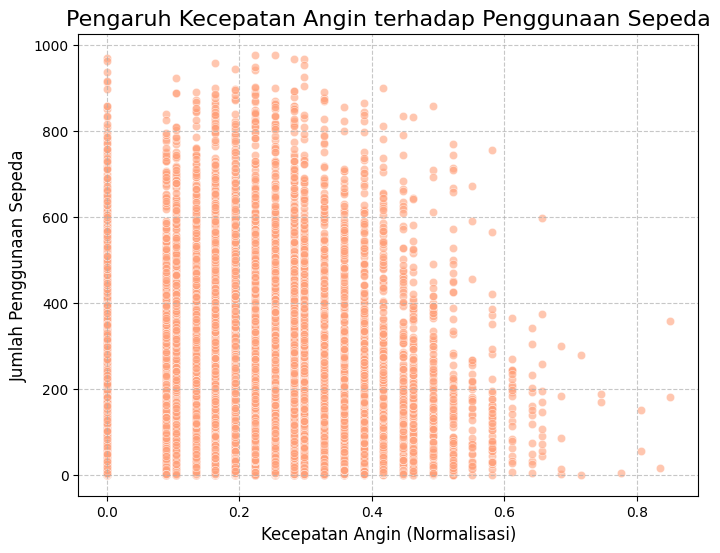

In [119]:
# Scatter plot kecepatan angin vs penggunaan sepeda
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=day_hour_df,
    x="windspeed",
    y="hour_count",
    alpha=0.6,
    color="#FFA07A"
)
plt.title("Pengaruh Kecepatan Angin terhadap Penggunaan Sepeda", fontsize=16)
plt.xlabel("Kecepatan Angin (Normalisasi)", fontsize=12)
plt.ylabel("Jumlah Penggunaan Sepeda", fontsize=12)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()


**Insight:**
- Penggunaan sepeda tertinggi terjadi saat cuaca cerah atau berawan sebagian (Clear/Partly Cloudy), sedangkan kondisi cuaca ekstrem seperti hujan deras atau salju lebat (Heavy Rain/Snow) menunjukkan jumlah penggunaan yang paling rendah. Hal ini menunjukkan pengaruh kuat cuaca terhadap kenyamanan pengguna sepeda.
- Grafik scatterplot menunjukkan hubungan positif antara suhu dan penggunaan sepeda; semakin tinggi suhu, semakin banyak sepeda digunakan, hingga mencapai titik optimal sebelum sedikit menurun pada suhu sangat tinggi.
- Scatter plot menunjukkan bahwa kecepatan angin memiliki hubungan negatif dengan penggunaan sepeda. Pada kecepatan angin yang rendah, penggunaan sepeda cenderung tinggi. Namun, seiring meningkatnya kecepatan angin, jumlah penggunaan sepeda secara umum menurun. Hal ini mengindikasikan bahwa angin kencang dapat mengurangi kenyamanan atau keinginan pengguna untuk bersepeda.

## Analisis Lanjutan (Opsional)

Dilakukan pengelompokan data secara manual dan binning untuk mengidentifikasi pola berdasarkan kategori seperti jam sibuk, dan tingkat suhu.



In [120]:
# Manual grouping: Peak vs Off-Peak
def categorize_time(hour):
    if 7 <= hour <= 9 or 17 <= hour <= 19:
        return 'Peak Hours'
    else:
        return 'Off-Peak Hours'

# Tambahkan kolom baru
day_hour_df['time_category'] = day_hour_df['hr'].apply(categorize_time)

/var/folders/vs/zksk8xgx1vxczt_hfgx08gzc0000gn/T/ipykernel_34742/3296138669.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_category', y='total_usage', data=time_category_usage, palette='Blues')


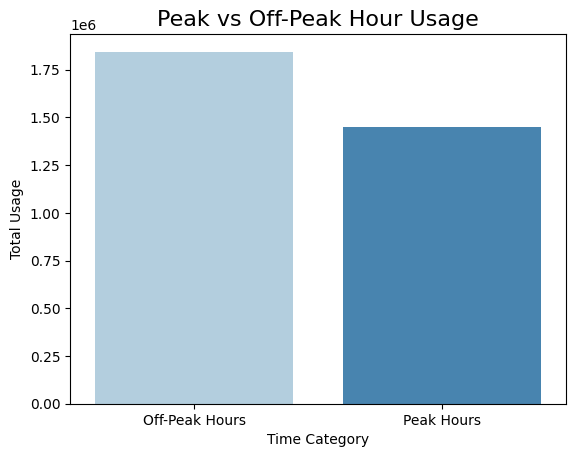

In [121]:
# Hitung total penggunaan berdasarkan kategori waktu
time_category_usage = day_hour_df.groupby('time_category')['hour_count'].sum().reset_index()
time_category_usage.columns = ['time_category', 'total_usage']

# Visualisasi hasil
sns.barplot(x='time_category', y='total_usage', data=time_category_usage, palette='Blues')
plt.title("Peak vs Off-Peak Hour Usage", fontsize=16)
plt.xlabel("Time Category")
plt.ylabel("Total Usage")
plt.show()

In [122]:
# Binning suhu menjadi kategori: Low, Medium, High
bins = [0, 0.33, 0.66, 1.0]
labels = ['Low', 'Medium', 'High']
day_hour_df['temp_category'] = pd.cut(day_hour_df['temp'], bins=bins, labels=labels)

/var/folders/vs/zksk8xgx1vxczt_hfgx08gzc0000gn/T/ipykernel_34742/830202176.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_usage = day_hour_df.groupby('temp_category')['hour_count'].sum().reset_index()
/var/folders/vs/zksk8xgx1vxczt_hfgx08gzc0000gn/T/ipykernel_34742/830202176.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp_category', y='total_usage', data=temp_usage, palette='coolwarm')


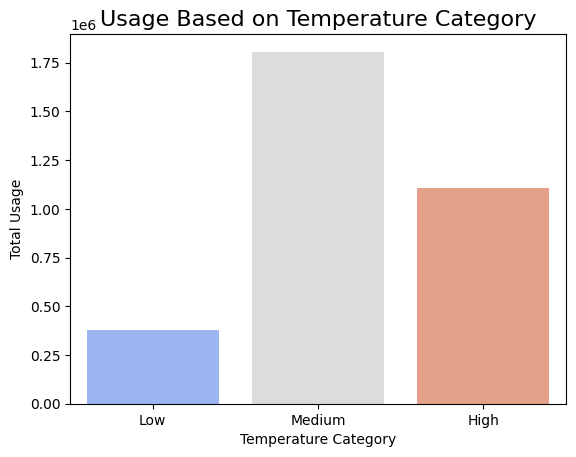

In [123]:
# Hitung total penggunaan berdasarkan kategori suhu
temp_usage = day_hour_df.groupby('temp_category')['hour_count'].sum().reset_index()
temp_usage.columns = ['temp_category', 'total_usage']

# Visualisasi hasil
sns.barplot(x='temp_category', y='total_usage', data=temp_usage, palette='coolwarm')
plt.title("Usage Based on Temperature Category", fontsize=16)
plt.xlabel("Temperature Category")
plt.ylabel("Total Usage")
plt.show()


## Conclusion

- Bagaimana pola penggunaan sepeda berdasarkan waktu (jam dan hari)?
Penggunaan sepeda cenderung meningkat pada jam sibuk pagi (07:00-09:00) dan sore (16:00-18:00), terutama pada hari kerja. Sedangkan pada akhir pekan, penggunaan lebih merata sepanjang hari, dengan puncak di tengah hari (11:00-14:00).
- Apakah ada perbedaan signifikan antara hari kerja dan akhir pekan, atau antara musim yang berbeda?
Hari kerja menunjukkan lonjakan penggunaan sepeda yang signifikan pada jam sibuk, sedangkan akhir pekan memiliki pola penggunaan yang lebih santai dan konsisten. Selain itu, musim panas dan musim semi mencatat jumlah penggunaan sepeda yang lebih tinggi dibanding musim dingin, karena kondisi cuaca yang lebih mendukung.
- Faktor apa saja yang mempengaruhi jumlah penggunaan sepeda, seperti cuaca, suhu, atau kecepatan angin? 
Penggunaan sepeda dipengaruhi oleh beberapa faktor, termasuk cuaca (kondisi cerah lebih mendorong penggunaan), suhu (suhu moderat meningkatkan penggunaan), dan kecepatan angin (angin kencang menurunkan penggunaan). Tingkat kelembapan juga menunjukkan pengaruh, di mana kelembapan tinggi sedikit menurunkan aktivitas bersepeda.

In [124]:
day_hour_df.to_csv('all_data.csv', index=False)

In [125]:
day_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hour_instant       17379 non-null  int64         
 1   dteday             17379 non-null  datetime64[ns]
 2   hr                 17379 non-null  int64         
 3   holiday            17379 non-null  int64         
 4   workingday         17379 non-null  int64         
 5   weathersit         17379 non-null  int64         
 6   temp               17379 non-null  float64       
 7   hum                17379 non-null  float64       
 8   windspeed          17379 non-null  float64       
 9   hour_count         17379 non-null  int64         
 10  instant_y          17379 non-null  int64         
 11  season             17379 non-null  int64         
 12  weekday            17379 non-null  int64         
 13  day_count          17379 non-null  int64         
 14  is_wee